In [2]:
from ftplib import FTP
import os
destdir='//home///shreyansh//python programs//sea and ice project'
directory = '/DATASETS/NOAA/G02135/north/daily/data'
password = 'sunnytyagi886@gmail.com'

ftpdir = 'sidads.colorado.edu'
print('Logging in')
ftp = FTP(ftpdir)
ftp.login('anonymous',password)
print('Changing to '+ directory)
ftp.cwd(directory)
files = ftp.nlst()
files = files[2:]
print(files)
os.chdir(destdir)
for file in files:
    print('Downloading...' + file)
    ftp.retrbinary('RETR ' + file, open(file, 'wb').write)
ftp.quit()

Logging in
Changing to /DATASETS/NOAA/G02135/north/daily/data
['N_seaice_extent_climatology_1981-2010_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv', 'N_seaice_extent_daily_v3.0.csv.bak']
Downloading...N_seaice_extent_climatology_1981-2010_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv
Downloading...N_seaice_extent_daily_v3.0.csv.bak


'221-Goodbye. You uploaded 0 and downloaded 3816 kbytes.\n221 Logout.'

In [38]:
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv", usecols = ['Extent'])
print(df)
print(type(df))

       Extent
0      10.231
1      10.420
2      10.557
3      10.670
4      10.777
...       ...
14051   7.791
14052   7.903
14053   8.005
14054   8.077
14055   8.132

[14056 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [39]:
import pandas as pd
import numpy as numpy
import csv as csv
path_to_import ='//home//shreyansh/python programs//sea and ice project//sea and ice.csv'
import_file = pd.read_csv(path_to_import,engine='python',encoding='utf-8-sig')

headers = pd.read_csv(path_to_import,nrows=0).columns.tolist()
print(headers)
columns = ['Extent']

path_to_selected = '//home//shreyansh/python programs//sea and ice project//extent_fetched.csv'
pd.read_csv(path_to_import,usecols=columns, sep=',').to_csv('extent_fetched.csv', index=False)

['Year', 'Month', 'Day', 'Extent', '    Missing', ' Source Data']


In [63]:
from pandas import *
from datetime import date
data=pd.read_csv("//home//shreyansh/python programs//sea and ice project//sea and ice.csv")
year=data['Year'].tolist()
month=data['Month'].tolist()
day=data['Day'].tolist()
extent=data['Extent'].tolist()
fetched_date=[]
def func_date(year,month,day):
    fetched_date.append(date(year,month,day))
    
diction=list(zip(year,month,day))
for i in range(len(diction)):
    func_date(diction[i][0],diction[i][1],diction[i][2])


In [64]:
regular_data=list(zip(fetched_date,extent))

In [65]:
from datetime import date
fetched_extent,regular_extent,regular_date=[],[],[]
for i in range(1,len(regular_data)):
    if (regular_data[i][0]-regular_data[i-1][0]).days==1:
        fetched_extent.append(regular_data[i])
        regular_extent.append(regular_data[i][1])
        regular_date.append(regular_data[i][0])
               


In [45]:
print(f'length of regularity in extent: {len(regular_extent)}')
print(f'date from when the data is regular: {fetched_extent[0][0]}')

length of regularity in extent: 12443
date from when the data is regular: 1987-08-21


In [46]:
import pandas as pd 
dict = {'Date':regular_date,'Extent':regular_extent}      
df = pd.DataFrame(dict)  
df.to_csv('REGULAR_DATE_EXTENT.csv',index=False) 


In [61]:
import pandas as pd 
dict = {'Extent':regular_extent}      
df = pd.DataFrame(dict)  
df.to_csv('REGULAR_EXTENT.csv',index=False) 

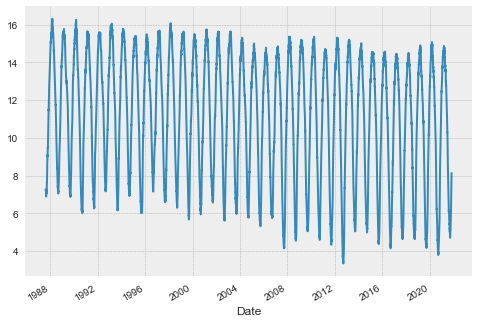

In [48]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

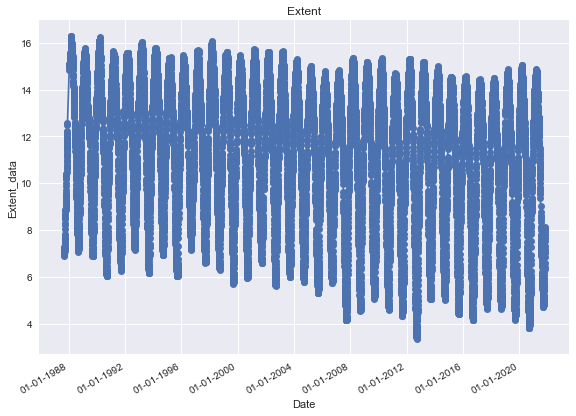

In [49]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import pandas as pd
plt.style.use('seaborn')

data = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)
extent_date=data['Date']
extent= data['Extent']
plt.plot_date(extent_date, extent, linestyle='solid')
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.tight_layout()
plt.title('Extent')
plt.xlabel('Date')
plt.ylabel('Extent_data')
plt.show()

In [50]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
df = pd.read_csv("//home//shreyansh/python programs//sea and ice project//REGULAR_EXTENT.csv")
df.shape


(12443, 1)

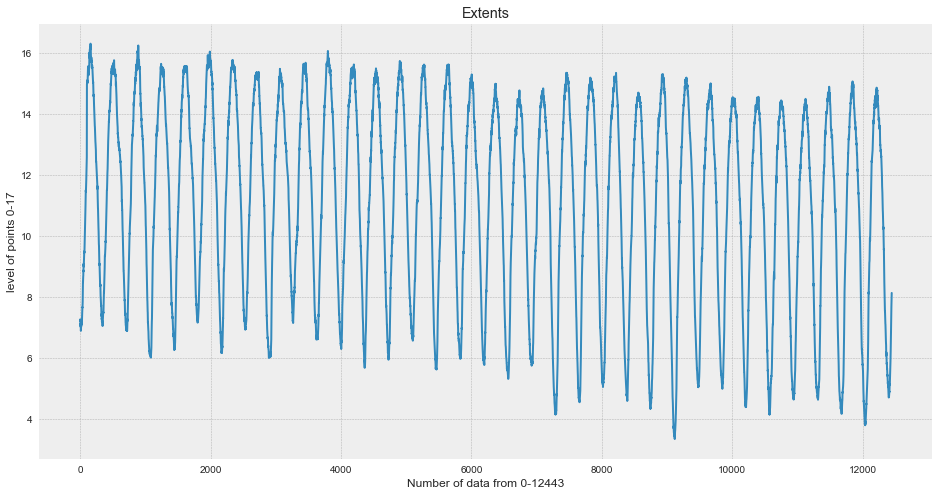

In [51]:
plt.figure(figsize=(16,8))
plt.title('Extents')
plt.xlabel('Number of data from 0-12443')
plt.ylabel('level of points 0-17')
plt.plot(df['Extent'])
plt.show()

In [75]:
future_days=15
df['prediction']=df[['Extent']].shift(-future_days)
#df.tail(4)
a=df['prediction']
df.head(4)


,Extent,Prediction,prediction
0,7.210,7.041,7.041
1,7.210,7.059,7.059
2,7.265,7.087,7.087
3,7.216,7.041,7.041


In [77]:
import pandas as pd 
dict = {'Extent':regular_extent,'Prediction': a}     
df = pd.DataFrame(dict) 
# saving the dataframe
df.to_csv('REGULAR_PREDICTION_EXTENT.csv',index=False)

In [56]:
x=np.array(df.drop(['prediction'],1))[:-future_days]
print(x)

[[7.21 ]
 [7.21 ]
 [7.265]
 ...
 [5.371]
 [5.416]
 [5.494]]


/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [57]:
y=np.array(df['prediction'])[:-future_days]
print(y)

[7.177 7.117 7.223 ... 8.005 8.077 8.132]


In [58]:
#split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [60]:
#create the model
# create the decision tree regression model
tree=DecisionTreeRegressor().fit(x_train,y_train)
#create the linear regression model
lr=LinearRegression().fit(x_train,y_train)

In [63]:
#get the last 'x' rows of the feature data set
x_future=df.drop(['prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[4.812],
       [4.771],
       [4.76 ],
       [4.708],
       [4.703],
       [4.728],
       [4.741],
       [4.74 ],
       [4.741],
       [4.778],
       [4.839],
       [4.837],
       [4.859],
       [4.904],
       [4.881],
       [4.975],
       [5.077],
       [5.131],
       [5.145],
       [5.12 ],
       [5.138],
       [5.228],
       [5.371],
       [5.416],
       [5.494]])

In [66]:
#show model tree prediction
tree_prediction=tree.predict(x_future)
print(tree_prediction)
print()
#show the linear regression prediction
lr_prediction=lr.predict(x_future)
print(lr_prediction)

[5.5715 5.0985 5.641  5.9325 5.875  5.895  5.425  6.08   5.425  6.301
 4.516  6.404  6.596  5.7815 7.0235 7.062  7.124  7.309  8.151  7.671
 7.791  8.102  6.6745 8.952  7.054 ]

[5.43807562 5.40117796 5.39127859 5.34448157 5.33998185 5.36248042
 5.37417968 5.37327974 5.37417968 5.40747756 5.46237408 5.46057419
 5.48037293 5.52087036 5.50017167 5.5847663  5.67656047 5.72515738
 5.73775658 5.71525801 5.73145698 5.81245184 5.94114366 5.98164109
 6.05183663]


/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


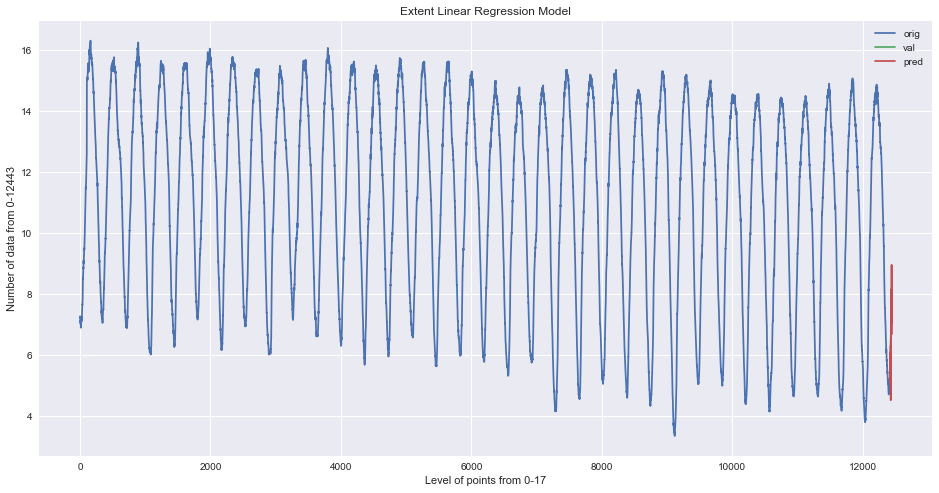

In [69]:
#visualize the data 
predictions=tree_prediction
valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Extent Linear Regression Model')
plt.xlabel('Level of points from 0-17')
plt.ylabel('Number of data from 0-12443')
plt.plot(df['Extent'])
plt.plot(valid[['Extent','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

/home/shreyansh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


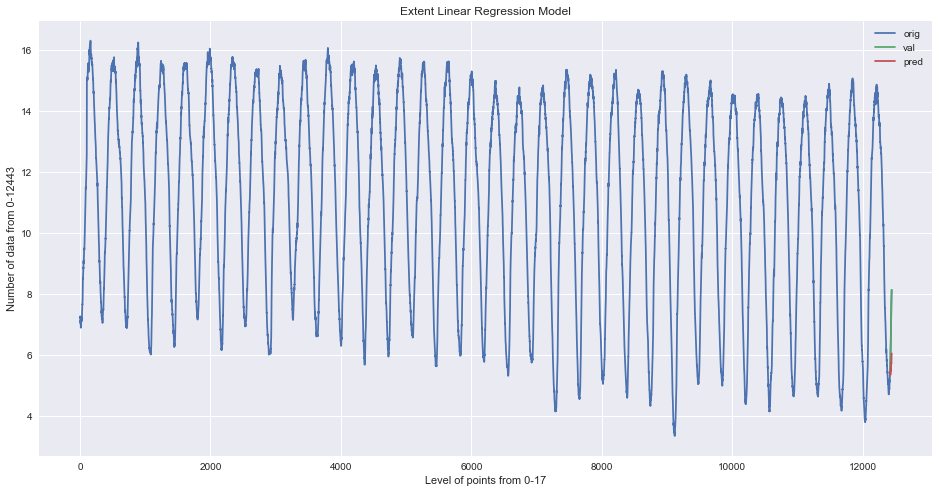

In [70]:
predictions=lr_prediction
valid=df[x.shape[0]:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Extent Linear Regression Model')
plt.xlabel('Level of points from 0-17')
plt.ylabel('Number of data from 0-12443')
plt.plot(df['Extent'])
plt.plot(valid[['Extent','predictions']])
plt.legend(['orig','val','pred'])
plt.show()

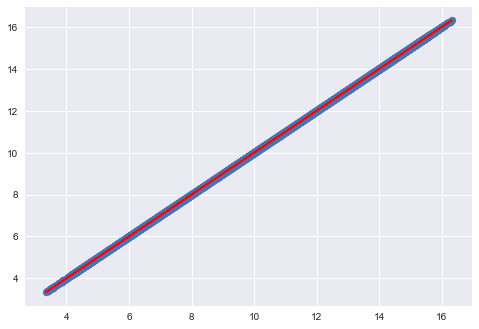

In [77]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd  # To read data\n",
from sklearn.linear_model import LinearRegression
data = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_PREDICTION_EXTENT.csv')  # load data set\n",
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array\n",
Y = data.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column\n",
linear_regressor = LinearRegression()  # create object for the class\n",
linear_regressor.fit(X, Y)  # perform linear regression\n",
Y_pred = linear_regressor.predict(X)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df = pd.read_csv('//home///shreyansh//python programs//sea and ice project//REGULAR_DATE_EXTENT.csv')

In [14]:
df.head()

,Date,Extent
0,1987-08-21,7.210
1,1987-08-22,7.210
2,1987-08-23,7.265
3,1987-08-24,7.216
4,1987-08-25,7.157


In [8]:
df.shape

(12443, 1)

## data visualization

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df['Date'],df['Extent'], test_size=0.2, random_state=42)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

#
print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

ValueError: Data must be 1-dimensional